     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0
(20, 9)


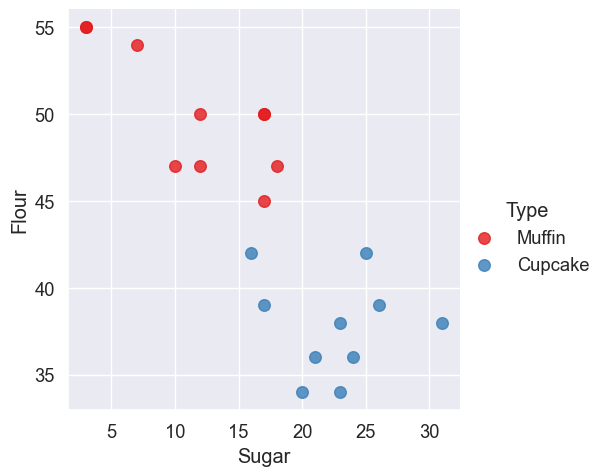

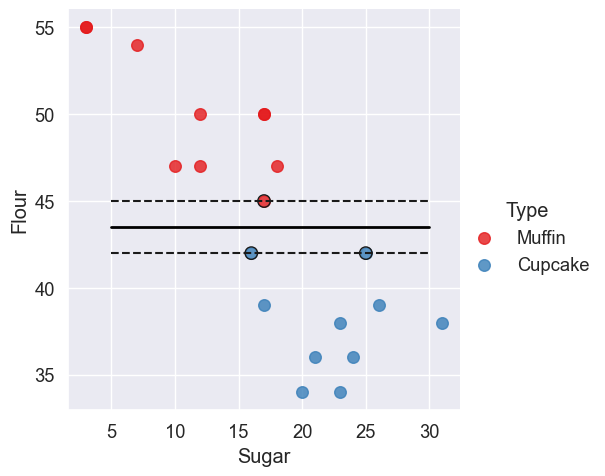

Predictions: [0 1 0 0]

Confusion Matrix:
 [[2 0]
 [1 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [11]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Set seaborn style
sns.set(font_scale=1.2)

# Load dataset
recipes = pd.read_csv('C://Users//Admin//Downloads//archive//recipes_muffins_cupcakes.csv')
print(recipes.head())
print(recipes.shape)

# Plot data
sns.lmplot(
    x='Sugar',
    y='Flour',
    data=recipes,
    hue='Type',
    palette='Set1',
    fit_reg=False,
    scatter_kws={"s":70}
)

# Prepare data
sugar_flour = recipes[['Sugar', 'Flour']].values
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)

# Train SVM model
model = svm.SVC(kernel='linear')
model.fit(sugar_flour, type_label)

# Get separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0] / w[1])

# Margins
b_down = model.support_vectors_[0]
yy_down = a * xx + (b_down[1] - a * b_down[0])

b_up = model.support_vectors_[-1]
yy_up = a * xx + (b_up[1] - a * b_up[0])

# Plot hyperplane & margins
sns.lmplot(
    x='Sugar',
    y='Flour',
    data=recipes,
    hue='Type',
    palette='Set1',
    fit_reg=False,
    scatter_kws={"s":70}
)

plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

# Plot support vectors
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=80,
    facecolors='none',
    edgecolors='k'
)

plt.show()

# Train-test split for evaluation
x_train, x_test, y_train, y_test = train_test_split(
    sugar_flour, type_label, test_size=0.2, random_state=42
)

model1 = svm.SVC(kernel='linear')
model1.fit(x_train, y_train)

# Predictions
pred = model1.predict(x_test)
print("Predictions:", pred)

# Confusion matrix & classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))